# SARIMA - Forecast

In [35]:
import pandas as pd
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(15)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Use Interplotation to Fill Missing Values

In [36]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

## Plotting the Pettah Average Price

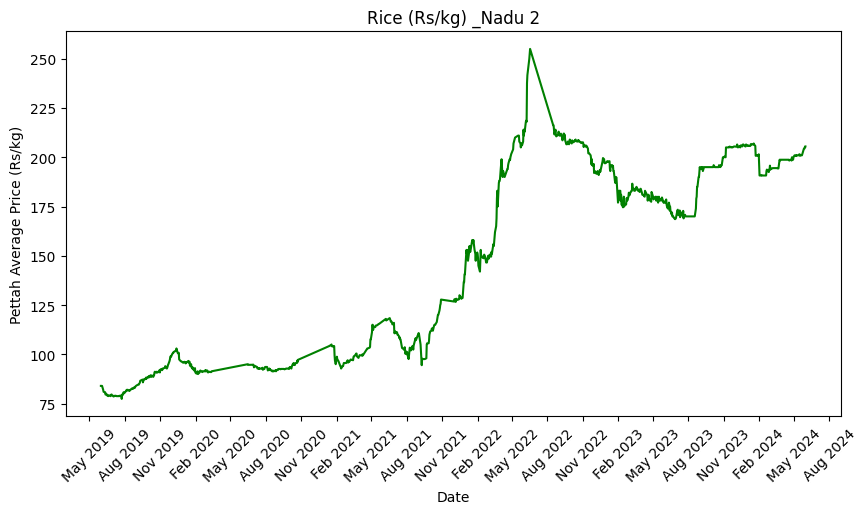

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Reset the index to make 'date' a regular column
filtered_df = filtered_df.reset_index()
# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Drop Features 

In [38]:
# filtered_df.drop(columns=['items','percipitation', 'pettah_min_value', 'pettah_max_value', 'food_inflation_Base_2013', 'Bankrupt',
#                           'percipitation','pettah_range','pettah_midpoint','pettah_avg_sma_150','pettah_avg_sma_14','ema_7','ema_30'], inplace=True)

filtered_df.drop(columns=['items', 'pettah_min_value',
       'pettah_max_value', 'food_inflation_Base_2013', 'percipitation',
       'Bankrupt', 'pettah_range', 'pettah_midpoint'], inplace=True)

In [39]:
filtered_df = filtered_df.drop('index', axis=1) 

In [40]:
filtered_df.head(15)

,date,pettah_average
0,2019-05-31,84.000000
1,2019-06-01,84.000000
2,2019-06-02,84.000000
3,2019-06-03,84.000000
4,2019-06-04,83.333333
5,2019-06-05,82.666667
6,2019-06-06,82.000000
7,2019-06-07,81.000000
8,2019-06-08,80.933333
9,2019-06-09,80.866667


## Set Date Column into Index

In [41]:
# Set 'date' as the index of the DataFrame
filtered_df.set_index('date', inplace=True)

## Train/Test Split 

In [ ]:
test_data = 7

train = filtered_df[:-test_data]
test = filtered_df[-test_data:]

## Fit the model SARIMA

In [43]:
from pmdarima import auto_arima

# ARIMA Model

sarima_model = auto_arima(train['pettah_average'],seasonal=True , m = 7)

print(sarima_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1821
Model:             SARIMAX(4, 1, 5)x(0, 0, [1, 2], 7)   Log Likelihood               -2773.135
Date:                                Fri, 08 Nov 2024   AIC                           5570.271
Time:                                        15:25:50   BIC                           5636.350
Sample:                                    05-31-2019   HQIC                          5594.650
                                         - 05-24-2024                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0625      0.105      0.596      0.551      -0.143       0.268
ar.

In [44]:
# Predicting with the ARIMA Model

test_predictions = sarima_model.predict(n_periods=len(test))

test_predictions

2024-05-25    202.425723
2024-05-26    202.432820
2024-05-27    202.495466
2024-05-28    202.593119
2024-05-29    202.663060
2024-05-30    202.797827
2024-05-31    202.953329
Freq: D, dtype: float64

## Evaluate Model Performances 

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , mean_absolute_percentage_error
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(test['pettah_average'], test_predictions)
mae = mean_absolute_error(test['pettah_average'], test_predictions)
mse = mean_squared_error(test['pettah_average'], test_predictions , squared=False)
mape = mean_absolute_percentage_error(test['pettah_average'], test_predictions) * 100
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error (MAE): 1.804379289934555
Mean Squared Error (MSE): 1.9274940206401379
Root Mean Squared Error (RMSE): 1.388342184275958
Mean Absolute Percentage Error: 0.8813082496758498


c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
